# This file is for all sort of test purposes nothing important but some shortcuts are present

# Convert all pixel to 0-1

# Convert all pixel to 0 , 255

In [1]:
import numpy as np
import cv2
from PIL import Image
# import PIL as PIL
from matplotlib import pyplot as plt
%matplotlib inline

<class 'PIL.PngImagePlugin.PngImageFile'>
(28, 28)


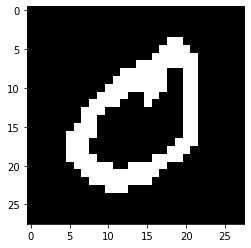

In [39]:
#Open and show image using Pillow
im = Image.open(r"mnist.png")
print(type(im))   # if an image is opened using pillow then it will of type PIL

print(im.size) # the size will be row*height


plt.imshow(im)
plt.show()

<class 'numpy.ndarray'>
(45, 45, 3)
6075
uint8


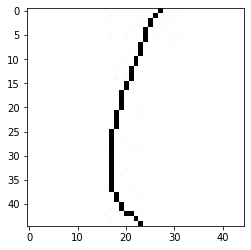

In [2]:
#open image using opencv2
img = cv2.imread('test.jpg')
print(type(img))
print(img.shape)
print(img.size)
print(img.dtype)
#Plot images that are numpy arrays
plt.imshow(img)
plt.show()

In [7]:
#Converting numpy to gray but dimension is lost
img2gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img2gray)
print(type(img2gray))
print(img2gray.shape)
print(img2gray.size)
print(img2gray.dtype)

y = np.expand_dims(img2gray, axis=2)
print(y.shape)


# plt.imshow(y)
# plt.show()
# cv2.imshow('Gray image', y)
  
# cv2.waitKey(0)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<class 'numpy.ndarray'>
(45, 45)
2025
uint8
(45, 45, 1)


-1

## Helper Functions

1. Opening image with opencv //
2. Saving image with opencv //
3. Opening image with PIL //
4. Saving image with PIL // Not needed really
5. Expanding shape of a numpy array //
6. Plotting image with matplotlib //
7. Plotting image with opencv //
8. Printing information //
9. Converting or inverting pixels // 
10. Identifying text and converting only that to white //
11. Converting image to grayscale //
12. Converting image to pure black and white or only making 255 or 0 //
13. Converting pixel to 1 and 0 float number //lagbena
14. Reducing a image shape or size // done
15. Erosion and dilation of image //
16. 

In [28]:
class ImageConversions:
    def openImageUsingCV(self,path):
        img = cv2.imread(path)
        return img

    def saveNumpyImage(self,path,numImg):
        cv2.imwrite(path, numImg) 

    def openImageUsingPillow(self,path):
        im = Image.open(path)
        return im

    def savePILImage(self,path,img):
        img.save(path)

    def expandShape(self,numarray,axisNumber):
        a=np.expand_dims(numarray,axis=axisNumber)
        return a 

    def plotImageUsingMATPLOTLIB(self,img):
        plt.imshow(img)
        plt.show()

    def plotImageUsingCV(self,img):
        cv2.imshow('Gray image', img)
        cv2.waitKey(0)

    def printInformation(self,obj):
        print(type(obj))
        if isinstance(obj,np.ndarray):
            print('Numpy object ')
            print('Object shape: ',obj.shape)
            print('Object size: ',obj.size)
            print('Object type: ',obj.dtype)
        elif isinstance(obj,PIL.JpegImagePlugin.JpegImageFile):
            print('Pillow object of JPEG file')
        elif isinstance(obj,PIL.PngImagePlugin.PngImageFile):
            print('Pillow object of PNG file')

    def pixelInversion0to255(self,img): # inverts image b - w or w - b
            copyImage = np.copy(img)
            copyImage[img > 175] = 0
            copyImage[img <= 175] = 255
            return copyImage

    def isTextWhite(self,img): #returns true if text white else false
        white=np.sum(img >= 127)
        black=np.sum(img < 127)
        if(white>black):
            return False
        else:
            return True

    def convertToGrayScale(self,img): #returns grayscale image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return gray

    def convertOnlyto255and0(self,img): # returns image to 0 and 255 image
        grayImage=self.convertToGrayScale(img)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
        

        return blackAndWhiteImage
    
    def makeTextWhite(self,img):
        bwImg=self.convertOnlyto255and0(img)
        self.printInformation(bwImg)
        if(self.isTextWhite(bwImg)==False):
            whiteTextImage=self.pixelInversion0to255(bwImg)
        else:
            whiteTextImage = bwImg
        inv=self.expandShape(whiteTextImage,2)
        return inv
    
    def dilate(self,img):
        kernel = np.ones((5,5),np.uint8)
        # erosion = cv2.erode(img,kernel,iterations = 1)
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        dilation = cv2.dilate(img,kernel,iterations = 1)
        return dilation
    
    def erode(self,img):
        kernel = np.ones((5,5),np.uint8)
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        erosion = cv2.erode(img,kernel,iterations = 1)
#         dilation = cv2.dilate(img,kernel,iterations = 1)
        return erosion

    def resize(self,img,width,height):
        dim=(width,height)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        return resized

In [30]:
p=ImageConversions()
img=p.openImageUsingCV('test.jpg')
a=p.makeTextWhite(img)
p.printInformation(a)
print(p.isTextWhite(img))
s=p.makeTextWhite(img)
p.plotImageUsingCV(s)
aa=p.dilate(s)
p.plotImageUsingCV(aa)
xx=p.resize(aa,28,28)
p.plotImageUsingCV(xx)
p.printInformation(aa)
p.printInformation(xx)

<class 'numpy.ndarray'>
Numpy object 
Object shape:  (45, 45)
Object size:  2025
Object type:  uint8
<class 'numpy.ndarray'>
Numpy object 
Object shape:  (45, 45, 1)
Object size:  2025
Object type:  uint8
False
<class 'numpy.ndarray'>
Numpy object 
Object shape:  (45, 45)
Object size:  2025
Object type:  uint8
<class 'numpy.ndarray'>
Numpy object 
Object shape:  (45, 45)
Object size:  2025
Object type:  uint8
<class 'numpy.ndarray'>
Numpy object 
Object shape:  (28, 28)
Object size:  784
Object type:  uint8


In [11]:
# x=openImageUsingCV('test.jpg')
# a=convertToGrayScale(x)
# saveNumpyImage('testSave.jpg',a)

# x=openImageUsingPillow('test.jpg')
# # savePILImage('testPIL.jpg',x)
# x=openImageUsingCV('a33.jpg')
# bw=convertOnlyto255and0(x)
# bww=expandShape(bw,2)
# printInformation(bww)
# print(bww)
# s=pixelInversion0to255(bww)
# # s1=pixelInversion0to255(s)
# plotImageUsingCV(s)
# q=isTextWhite(s)
# print(q)

# sa=cv2.countNonZero(s1)
# print(sa)
p=ImageConversions()
img=p.openImageUsingCV('test.jpg')
im=p.makeTextWhite(img)
# a=p.convertOnlyto255and0(img)
# s=p.makeTextWhite(a)
# print(s)
p.plotImageUsingCV(im)

In [36]:
img=openImageUsingCV('a33.jpg')
# img=openImageUsingPillow('a33.jpg')
printInformation(img)
# print(img)
grayImage=convertToGrayScale(img)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
print(blackAndWhiteImage)
# plotImageUsingMATPLOTLIB(blackAndWhiteImage)
cv2.imshow('Black white image', blackAndWhiteImage)
cv2.waitKey(0)


<class 'numpy.ndarray'>
Numpy object 
Object shape:  (353, 1270, 3)
Object size:  1344930
Object type:  uint8
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


-1

In [71]:
img=openImageUsingCV('test.jpg')
print(img)
im=pixelInversion(img)
print(im)
# printInformation(img)
# gray=convertToGrayScale(img)
# printInformation(gray)
# gre=expandShape(gray,2)
# printInformation(gre)
# plotImageUsingCV(gre)
# plotImageUsingMATPLOTLIB(gre)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


IndexError: index 255 is out of bounds for axis 0 with size 45